# Erzeugen von Zufallszahlen

## Normalverteilte Zufallszahlen

In [1]:
import numpy

In [2]:
!pip install numpy

In [3]:
numpy.random.seed( 42 )

In [4]:
A = numpy.random.normal( loc = 0.0, scale = 1.0, size = 10000 )

In [5]:
A

array([ 0.49671415, -0.1382643 ,  0.64768854, ..., -0.70531672,
        0.49576557,  0.64438845])

In [6]:
A.min()

-3.9224002516183423

In [7]:
A.max()

3.9262377064363267

In [8]:
A.shape

(10000,)

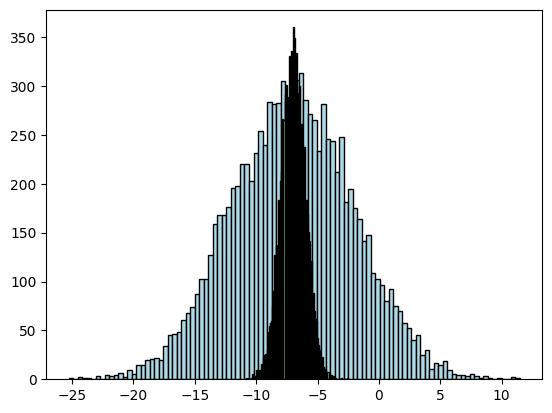

In [9]:
A = numpy.random.normal( loc = -7.0, scale = 1.0, size = 10000 )
B = numpy.random.normal( loc = -7.0, scale = 5.0, size = 10000 )

import matplotlib.pyplot as plt
plt.hist(B, bins=100, color="lightblue",  edgecolor="black")
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

In [10]:
A[:5]

array([-7.67849473, -7.30549946, -7.59738106, -6.88958195, -5.80282147])

## Gleichverteilte Zufallszahlen

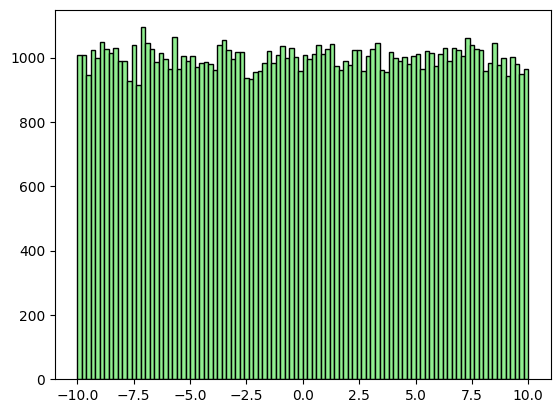

In [11]:
C = numpy.random.uniform(low = -10, high = +10, size = 100000)

import matplotlib.pyplot as plt
plt.hist(C, bins=100, color="lightgreen", edgecolor="black")
plt.show()

# Simulation eines Abstandssensors mit linearer Kennlinie

In [12]:
numpy.random.seed( 42 )

class absstandssensor_lineare_kennlinie:

    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)

    def sample(self, abstand):
        sensorwert = abstand + numpy.random.normal(loc=self.bias,
                                                   scale=self.noise)
        return sensorwert

    def kennlinie(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.sample( abstand )
            abstaende.append( abstand )
            sensorwerte.append( sensorwert )

        return numpy.array( abstaende ), numpy.array( sensorwerte )

    def zeige_kennlinie(self):
        a,s = self.kennlinie()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()


a1 = absstandssensor_lineare_kennlinie()

In [13]:
a1.bias

-2.50919762305275

In [14]:
a1.noise

4.802857225639665

In [15]:
a1.sample(10)

10.601557952128152

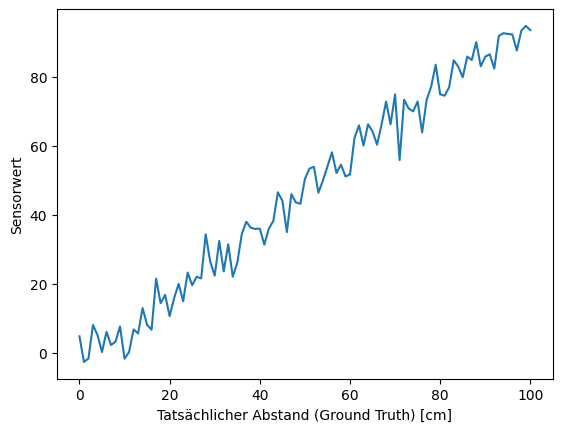

In [16]:
a1.zeige_kennlinie()

In [17]:
a1.kennlinie()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([ -3.28382987,   0.43140095,   8.54988396,   1.32927469,
          2.72778013,   2.13324927,  -5.72478182,   4.36346002,
          5.78007948,  18.32140256,   6.56692013,   9.93909121,
          9.3240867 ,   4.87780862,  16.97961719,  16.10222938,
         17.29001588,  10.12314427,  22.22822317,   9.75791187,
         20.30939321,  29.01124801,  14.73339783,  17.77095523,
         21.96941366,  20.07268069,  16.04318

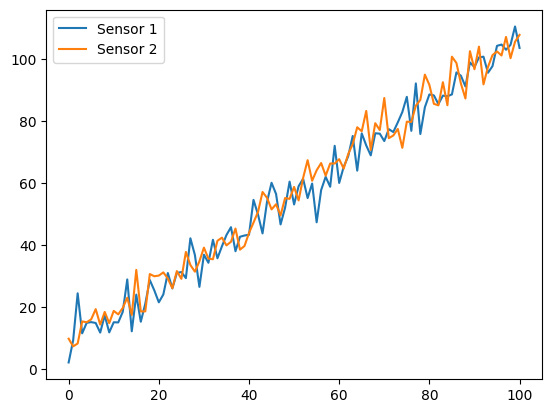

In [18]:
s1 = absstandssensor_lineare_kennlinie()
s2 = absstandssensor_lineare_kennlinie()

a1,sw1 = s1.kennlinie()
a2,sw2 = s2.kennlinie()
plt.plot(a1,sw1, label = "Sensor 1")
plt.plot(a2,sw2, label = "Sensor 2")
plt.legend()
plt.show()

In [19]:
s1.bias

6.187223109570272

In [20]:
s2.bias

7.341446371602075

In [21]:
s1.noise

4.240453578716723

In [22]:
s2.noise

4.652962210225885

# Fehlerfunktion für Fusionsergebnisse

In [23]:
gt          = numpy.array( [1,   2,   3,   4,   5]   )
sensorwerte = numpy.array( [0.5, 2.5, 2.5, 4.5, 5.5] ) 

In [24]:
type(gt)

numpy.ndarray

In [25]:
type(sensorwerte)

numpy.ndarray

In [26]:
# Mean Absolute Error (MAE)
numpy.mean(abs(gt - sensorwerte))

0.5

In [27]:
def MAE_metrics(gt, sensorwerte):
    MAE = numpy.mean(abs(gt - sensorwerte))
    return MAE

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error( a1, sw1 )

6.668393555792999

In [29]:
MAE_metrics( a1, sw1 )

6.668393555792999

# Erster Versuch eines Fusionsansatzes (Mittelwertbildung)

## Fehler bei Verwendung nur eines Sensors

In [30]:
s1 = absstandssensor_lineare_kennlinie()
s2 = absstandssensor_lineare_kennlinie()

s1.bias = +3.1
s2.bias = +4.2

a1,sw1 = s1.kennlinie()
a2,sw2 = s2.kennlinie()

In [31]:
MAE_metrics(a1, sw1)

3.8213005103945417

In [32]:
MAE_metrics(a2, sw2)

4.167555824982728

## Sensordatenfusion über einfache Mittelwertbildung

In [33]:
sw_fusioniert = (sw1 + sw2) / 2
sw_fusioniert[:5]

array([3.89677561, 6.18138967, 4.87951721, 8.32037037, 7.98405519])

In [34]:
MAE_metrics(a1, sw_fusioniert)

3.538287066004947

In [35]:
s1.bias

3.1

In [36]:
s2.bias

4.2

## Experimentelle Bestimmung der Biase

In [37]:
# 1. Erzeuge Sensoren
s1 = absstandssensor_lineare_kennlinie()
s2 = absstandssensor_lineare_kennlinie()

# 2. Wie gut sind die Sensoren alleine?
print("Sensor1 alleine: ", MAE_metrics(a1, sw1))
print("Sensor2 alleine: ", MAE_metrics(a1, sw2))

# 3. Bestimme die Biase der beiden Sensoren experimentell
a1, sw1 = s1.kennlinie()
bias1 = numpy.mean(a1-sw1)
a2, sw2 = s2.kennlinie()
bias2 = numpy.mean(a2-sw2)

# 4. Sensordatenfusion nun mit Bias-Korrektur!
sw1 = sw1 + bias1
sw2 = sw2 + bias2
sw_fusioniert = (sw1 + sw2) / 2
print("Sensor1+2 mit Bias Korrektur: ", MAE_metrics(a1, sw_fusioniert))

Sensor1 alleine:  3.8213005103945417
Sensor2 alleine:  4.167555824982728
Sensor1+2 mit Bias Korrektur:  2.3164296028075655


In [38]:
s1.bias

-9.63779632358319

In [39]:
s2.bias

8.642365649672247

In [40]:
bias1

9.807714494879164

In [41]:
bias2

-8.698943977914398

# Experiment: Immer mehr Sensoren

In [42]:
class A:

    def __init__(self):
        A.v1 = 42
        A.v2 = "Hallo"

In [43]:
a1 = A()

In [44]:
a1.v1

42

In [45]:
a1.v2

'Hallo'

In [46]:
a1.v3 = "Fehlermeldung: Festplatte voll!"

In [47]:
def exp(anz_sensoren):

    # 1. Erzeugen der gewünschten Anzahl von Sensoren
    alle_sensoren = []
    for sid in range(anz_sensoren):
        s = absstandssensor_lineare_kennlinie()
        alle_sensoren.append( s )

    # 2. Für jeden Sensor experimentell den Biaskorrekturwert bestimmen
    for sensor in alle_sensoren:
        a,sw = sensor.kennlinie()
        bias = numpy.mean(a-sw)
        sensor.bias_korrekturwert = bias   

    # 3. Simuliere Messungen
    alle_messungen = []
    gt = None
    for sensor in alle_sensoren:
        a,sw = sensor.kennlinie()
        sw = sw + sensor.bias_korrekturwert
        alle_messungen.append( sw )
        if gt is None:
            gt = a

    # 4. Sensordatenfusion
    N = len(alle_messungen[0])
    summe = numpy.zeros(N)
    for messung in alle_messungen:
        summe = summe + messung
    fusionierte_sw = summe / anz_sensoren

    # 5. Wie gut ist die Fusion?
    MAE = MAE_metrics(gt, fusionierte_sw)
    return MAE

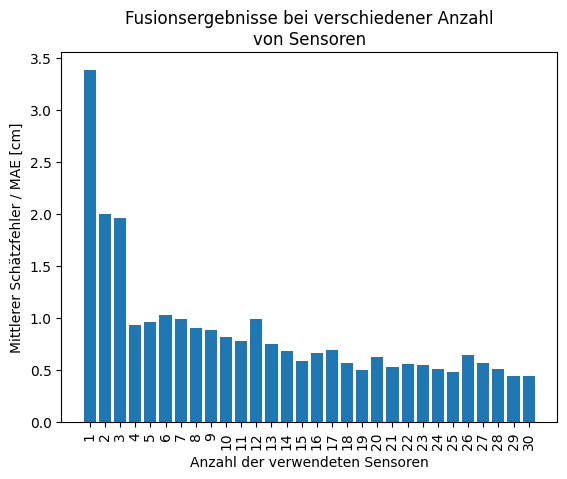

In [48]:
alle_MAEs = []
sensoranzahlen = []
for anz_sensoren in range(1,31):
    MAE = exp(anz_sensoren)
    alle_MAEs.append( MAE )
    sensoranzahlen.append( anz_sensoren )

import matplotlib.pyplot as plt
plt.bar( sensoranzahlen, alle_MAEs)
plt.xlabel("Anzahl der verwendeten Sensoren")
plt.ylabel("Mittlerer Schätzfehler / MAE [cm]")
plt.xticks( sensoranzahlen, rotation=90 )
plt.title("Fusionsergebnisse bei verschiedener Anzahl\nvon Sensoren")
plt.show()

# Simulation eines Sensors mit nicht-linearer Kennlinie

In [49]:
import numpy
import matplotlib.pyplot as plt

numpy.random.seed( 42 )

class absstandssensor_nichtlineare_kennlinie:

    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)

    def sample(self, abstand):
        sensorwert = numpy.log(1+abstand)*10 + numpy.random.normal(loc=self.bias,
                                                                scale=self.noise)
        return sensorwert

    def kennlinie(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.sample( abstand )
            abstaende.append( abstand )
            sensorwerte.append( sensorwert )

        return numpy.array( abstaende ), numpy.array( sensorwerte )

    def zeige_kennlinie(self):
        a,s = self.kennlinie()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()

    def __str__(self):
        return f"Bias: {self.bias:.2f}\nNoise: {self.noise:.2f}"
    


a1 = absstandssensor_nichtlineare_kennlinie()
a2 = absstandssensor_nichtlineare_kennlinie()

In [50]:
print(a1), print(a2)

Bias: -2.51
Noise: 4.80
Bias: 4.64
Noise: 3.39


(None, None)

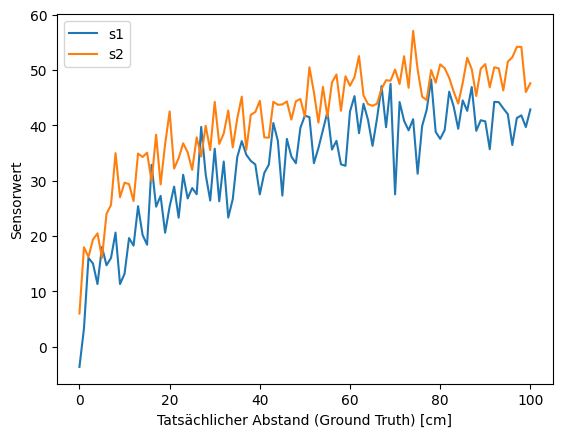

In [51]:
a,s1 = a1.kennlinie()
a,s2 = a2.kennlinie()
plt.plot(a,s1, label="s1")
plt.plot(a,s2, label="s2")
plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
plt.ylabel("Sensorwert")
plt.legend()
plt.show()

# Inverses Sensormodell

In [52]:
ism_a1 = {}

for abstand in range(0,101):

    sensorwerte = []
    for messung in range(0,50):
        sensorwerte.append( a1.sample(abstand) )

    mittlerer_sensorwert = numpy.mean( sensorwerte )
    ism_a1[mittlerer_sensorwert] = abstand
    #ism_a1[abstand] = mittlerer_sensorwert

In [53]:
def sensorwert_zu_abstand(sensorwert):

    min_dist = None
    best_key = None
    for key in ism_a1:
        dist = abs(sensorwert-key)
        if best_key == None or dist<min_dist:
            best_key = key
            min_dist = dist

    beste_entfernungs_schaetzung = ism_a1[best_key]
    return beste_entfernungs_schaetzung
        

In [54]:
numpy.argmin(abs(numpy.array(list(ism_a1.keys())) - 16.5))

6

In [55]:
sensorwert_zu_abstand(33)

36

In [56]:
index = numpy.argmin( abs(numpy.array( list(ism_a1.keys()) ) - 33) )
key = list(ism_a1.keys())[index]
ism_a1[key]

36

# Noch ein weiterer simulierter Sensor mit Mehrdeutigkeiten

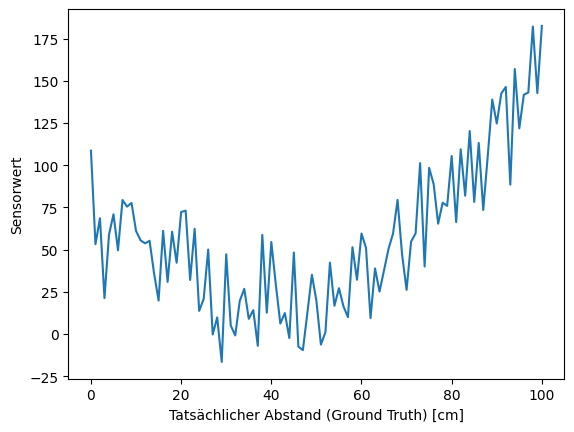

In [1]:
import numpy
import matplotlib.pyplot as plt

class absstandssensor_mehrdeutig:

    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        self.pos = numpy.random.uniform(low=1, high=100)

    def sample(self, abstand):
        sensorwert = abstand + \
                     5*numpy.sin(abstand/10) + \
                     4*numpy.random.normal(loc=self.bias, scale=self.noise) + \
                     ((abstand-self.pos)/5)**2
        return sensorwert

    def kennlinie(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.sample( abstand )
            abstaende.append( abstand )
            sensorwerte.append( sensorwert )

        return numpy.array( abstaende ), numpy.array( sensorwerte )

    def zeige_kennlinie(self):
        a,s = self.kennlinie()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()

    def __str__(self):
        return f"Bias: {self.bias:.2f}\nNoise: {self.noise:.2f}"
    


a1 = absstandssensor_mehrdeutig()
a1.zeige_kennlinie()

# Sensordatenfusion mittels Machine Learning

## Erstmal nur für 2 Sensoren

### 2 Sensoren erzeugen

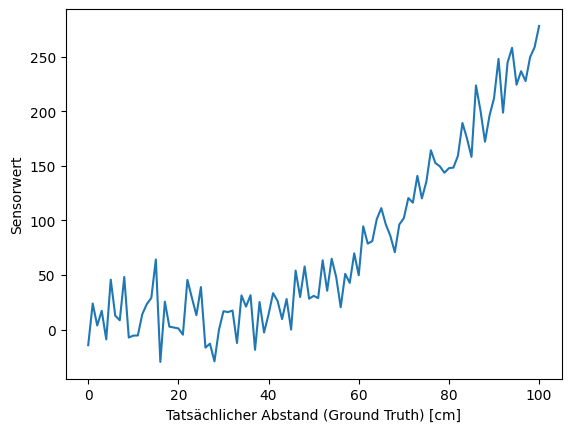

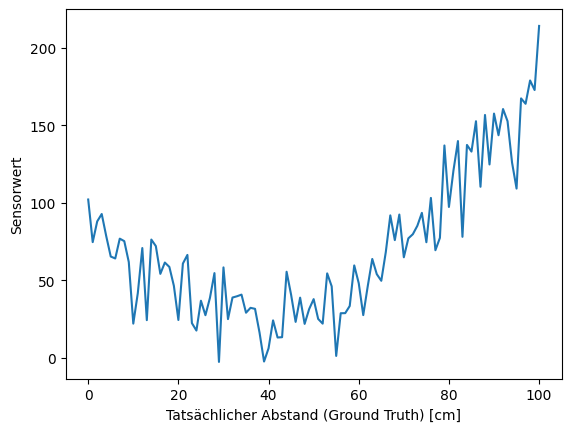

In [58]:
a1 = absstandssensor_mehrdeutig()
a1.zeige_kennlinie()

a2 = absstandssensor_mehrdeutig()
a2.zeige_kennlinie()

### Beispieldaten erzeugen

In [64]:
import numpy
N = 1000
X = numpy.zeros((N,2))
Y = numpy.zeros((N,1))

for i in range(N):
    abstand = numpy.random.uniform(low=0, high=100)
    sw1 = a1.sample(abstand)
    sw2 = a2.sample(abstand)
    X[i,0] = sw1
    X[i,1] = sw2
    Y[i,0] = abstand

In [65]:
X[:5]

array([[  5.15537412,  80.94866981],
       [190.81663695, 152.6649842 ],
       [ 36.75563475,  47.48966533],
       [244.15260082, 168.86158995],
       [ 28.89215098,  77.49781366]])

In [66]:
Y[:5]

array([[16.21833724],
       [86.6855213 ],
       [12.62834726],
       [93.35931437],
       [21.90591731]])

In [67]:
X.shape

(1000, 2)

In [68]:
Y.shape

(1000, 1)

Machine Learning Modell:

In [71]:
print(X[1], "--> MODELL -->", Y[1])

[190.81663695 152.6649842 ] --> MODELL --> [86.6855213]


In [72]:
X.shape

(1000, 2)

In [73]:
Y.shape

(1000, 1)

In [74]:
!pip install scikit-learn

### Train-/Test-Split

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [76]:
x_train.shape

(800, 2)

In [77]:
y_train.shape

(800, 1)

In [79]:
print( x_train[0], "--> MODELL -->", y_train[0] )

[26.85408309 33.93815005] --> MODELL --> [47.37601537]


In [80]:
x_test.shape

(200, 2)

In [81]:
y_test.shape

(200, 1)

In [82]:
print( x_test[0], "--> MODELL -->", y_test[0] )

[-14.44054237  43.64297802] --> MODELL --> [37.59383754]


### ML Modell erstellen und trainieren

In [83]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model = model.fit(x_train, y_train)

In [85]:
X.shape

(1000, 2)

In [91]:
x_train.ndim

2

In [92]:
y_train.ndim

2

### Modell nutzen zur Fusion

In [95]:
abstand = 55.7
sw1 = a1.sample(abstand)
sw2 = a2.sample(abstand)
print(sw1,sw2)

54.76686146094805 40.8268134502462


In [96]:
model.predict( [[sw1, sw2]] )

array([56.13558242])

### Modellgüte bestimmen

In [98]:
preds = model.predict(x_test)

In [99]:
preds.shape

(200,)

In [101]:
preds[:20]

array([22.26036365, 78.15231295, 78.90406042, 61.21662207,  8.46487536,
       41.67490606, 17.07602835, 54.80214972,  6.98619207, 83.02501928,
       58.38582673, 94.40947859, 60.33255656, 42.65919011, 18.62449383,
        9.97309723, 95.31246125, 50.43807043, 93.15350492, 33.41364119])

In [103]:
y_test[:20].flatten()

array([37.59383754, 64.59515311, 79.6300186 , 62.37721907,  5.08539688,
       27.72584163, 55.43225981, 38.7898529 , 13.9720567 , 90.44739273,
       54.23589505, 92.92806517, 66.29062523, 49.63227713,  6.66279984,
        7.50936458, 88.18548008, 46.10335681, 96.02663585, 36.05329179])

In [104]:
MAE_metrics(y_test.flatten(), preds)

9.62323264354509

### Alles in einem kleinen Skript

In [124]:
#a1 = absstandssensor_mehrdeutig()
#a1.zeige_kennlinie()

#a2 = absstandssensor_mehrdeutig()
#a2.zeige_kennlinie()


import numpy
N = 100000
X = numpy.zeros((N,2))
Y = numpy.zeros((N,1))

for i in range(N):
    abstand = numpy.random.uniform(low=0, high=100)
    sw1 = a1.sample(abstand)
    sw2 = a2.sample(abstand)
    X[i,0] = sw1
    X[i,1] = sw2
    Y[i,0] = abstand

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn import tree
model = tree.DecisionTreeRegressor()
model = model.fit(x_train, y_train)

preds = model.predict(x_test)
print("MAE=", MAE_metrics(y_test.flatten(), preds))

MAE= 4.118445488475788


## Für n Sensoren

In [12]:
import numpy
def MAE_metrics(gt, sensorwerte):
    MAE = numpy.mean(abs(gt - sensorwerte))
    return MAE


def ein_experiment(N_sensoren):
    
    # 1. Erzeuge mehrere Sensoren
    #    und speichere diese in einer Liste
    sensoren = []
    for sensor_nr in range(N_sensoren):
        a = absstandssensor_mehrdeutig()
        sensoren.append( a )
    
    # 2. Erzeuge ein NumPy-Array, um Beispieldaten
    #    für die N_sensoren zu speichern
    import numpy
    N = 10000
    X = numpy.zeros((N,N_sensoren))
    Y = numpy.zeros((N,1))
    
    # 3. Erzeuge Beispiele der Form
    #    x = (10.2 5.7 3.9) --> y = (5.0)
    for i in range(N):
        abstand = numpy.random.uniform(low=0, high=100)
        for sensor_nr in range(N_sensoren):
            sw = sensoren[sensor_nr].sample(abstand)
            X[i,sensor_nr] = sw
        
        Y[i,0] = abstand
    
    # 4. Train-/Test-Split
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    # 5. Modell lernen
    from sklearn import tree
    model = tree.DecisionTreeRegressor()
    model = model.fit(x_train, y_train)
    
    # 6. Modell auf den Testdaten testen
    preds = model.predict(x_test)
    MAE = MAE_metrics(y_test.flatten(), preds)
    return MAE    

In [13]:
numpy.arange(1, MAX_ANZ_SENSOREN+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

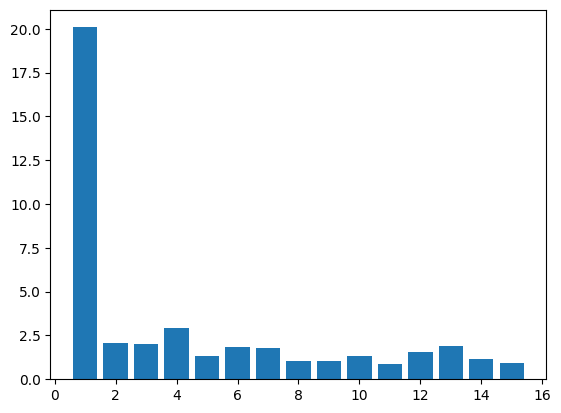

In [14]:
MAX_ANZ_SENSOREN = 15
MAEs = []
for anz_sensoren in range(1,MAX_ANZ_SENSOREN+1):    
    MAE = ein_experiment(anz_sensoren)
    MAEs.append( MAE )

import matplotlib.pyplot as plt
plt.bar( numpy.arange(1, MAX_ANZ_SENSOREN+1), MAEs )
plt.show()    